In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
import sys
import os


src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
if src_path not in sys.path:
    sys.path.insert(0, src_path)
%load_ext autoreload
%autoreload 2

from jobs_tools import data_cleaning

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
df = pd.read_csv("../data/csv/df_final.csv").copy()
df.head()

,Location,Region,EU Member,Schengen Agreement,Google Domain Type,Google Domain Used,Job Title,Company Name,Job Location,Apply Options,...,native_interop,native_ui,networking,platform_android,platform_apple,runtimes,security_compliance,team_collaboration,testing_quality,version_control
0,Austria,Europe,True,True,default,google.com,"Android Developer – Kotlin (Austria based, Hyb...",Bitcoin Devs Company,"Vienna, Austria",Jobs3,...,NaN,NaN,Retrofit,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,Europe,True,True,default,google.com,ios entwickler 80–100% w/m/d,CHANCENLAND VORARLBERG,"Dornbirn, Austria","IT-Career.at, STEMJOBS.AT, IT-JOBS.AT",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Austria,Europe,True,True,default,google.com,Middle iOS developer,Processica,"Vienna, Austria",JOBITT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,Europe,True,True,default,google.com,iOS Developer,Raiffeisen Gruppe,"Linz, Austria","Jooble, Trabajo.org - Stellenangebote, Arbeit",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Austria,Europe,True,True,default,google.com,iOS Software Engineer,Cybermoth,"Vienna, Austria","Expertini, Talent.com",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Leave only the necessary columns

In [65]:
df = data_cleaning.filtered_data(df)
df.head()

,Location,Region,Job ID,Platform,api_documentation,app_distribution,architecture,backend_baas,build_dependency,ci_cd,...,native_interop,native_ui,networking,platform_android,platform_apple,runtimes,security_compliance,team_collaboration,testing_quality,version_control
0,Austria,Europe,eyJqb2JfdGl0bGUiOiJBbmRyb2lkIERldmVsb3BlciDigJ...,Android,NaN,Google Play Store / Google Play Console,Model-View-ViewModel (MVVM),NaN,NaN,NaN,...,NaN,NaN,Retrofit,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,Europe,eyJqb2JfdGl0bGUiOiJpb3MgZW50d2lja2xlciA4MOKAkz...,iOS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Austria,Europe,eyJqb2JfdGl0bGUiOiJNaWRkbGUgaU9TIGRldmVsb3Blci...,iOS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,Europe,eyJqb2JfdGl0bGUiOiJpT1MgRGV2ZWxvcGVyIiwiY29tcG...,iOS,NaN,NaN,NaN,NaN,Gradle,Jenkins,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Austria,Europe,eyJqb2JfdGl0bGUiOiJpT1MgU29mdHdhcmUgRW5naW5lZX...,iOS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df.to_csv("../data/csv/df_final_filtered.csv", index=False)

## Re-creating data form "wide" to "long" format

In [67]:
long = data_cleaning.wide_long(df)
long.head()
long.to_csv('../data/csv/df_final_filtered_long.csv', index=False)

## Results

In [68]:
eu_android = long[(long['Region'] =='Europe') & (long['Platform'] =='Android')].reset_index(drop=True)
eu_ios = long[(long['Region'] =='Europe') & (long['Platform'] =='iOS')].reset_index(drop=True)

na_android = long[(long['Region'] =='Northern America') & (long['Platform'] =='Android')].reset_index(drop=True)
na_ios = long[(long['Region'] =='Northern America') & (long['Platform'] =='iOS')].reset_index(drop=True)

In [69]:
sorted(long['Category'].unique())

['api_documentation',
 'app_distribution',
 'architecture',
 'backend_baas',
 'build_dependency',
 'ci_cd',
 'concurrency_reactive',
 'cross_platform_sdks',
 'cross_platform_ui',
 'data_storage',
 'debug_profiling',
 'dependency_injection',
 'design_guidelines',
 'game_dev',
 'ides',
 'languages',
 'methodologies',
 'monitoring_analytics',
 'native_interop',
 'native_ui',
 'networking',
 'platform_android',
 'platform_apple',
 'runtimes',
 'security_compliance',
 'team_collaboration',
 'testing_quality',
 'version_control']

### API specification and documentation (api_documentation)
#### Andoid

In [70]:
data_cleaning.make_table(df=eu_android, category='api_documentation')

,Technology,count,percent
0,Swagger,4,0.58
1,OpenAPI,2,0.29


In [71]:
data_cleaning.make_table(df=na_android, category='api_documentation')

,Technology,count,percent
0,OpenAPI,1,0.35
1,Swagger,1,0.35


#### iOS

In [72]:
data_cleaning.make_table(df=eu_ios, category='api_documentation')

,Technology,count,percent
0,OpenAPI,1,0.13
1,Swagger,1,0.13


In [73]:
data_cleaning.make_table(df=na_ios, category='api_documentation')

,Technology,count,percent


### Application publishing and distribution (app_distribution)

### Total

In [ ]:
data_cleaning.make_table(df=eu_android, total=True)

,Technology,count,percent
0,Kotlin,600,87.21
1,Java,368,53.49
2,Git,207,30.09
3,Jetpack Compose,198,28.78
4,Android SDK,181,26.31
...,...,...,...
131,Google Cloud Messaging,1,0.15
132,MongoDB,1,0.15
133,Open Web Application Security Project (OWASP),1,0.15
134,NFC,1,0.15


---

## Data to Excel (old)

In [ ]:
# ---------- ПАРАМЕТРЫ -------------
OUT         = 'C:\\Users\\ireev\\Desktop\\mobile_tech_summary.xlsx'  # куда сохранить Excel
REG_EU      = 'Europe'
REG_NA      = 'Northern America'
PLATFORMS   = ('iOS', 'Android')               # порядок секций внутри листа
# Переименуйте как хотите
ALIASES = dict(EU_count='EU count',
                EU_pct  ='EU %',
                NA_count='NA count',
                NA_pct  ='NA %')
# ----------------------------------


tech_cols = df.columns[df.columns.get_loc('architectural_patterns'):]

def count_pct(series: pd.Series) -> pd.DataFrame:
    total = len(series)
    vc    = (series.dropna()
                   .str.split(',')
                   .explode()
                   .str.strip()
                   .value_counts())
    pct   = (vc / total * 100).round(2)
    out   = pd.DataFrame({'count': vc.astype(int), 'pct': pct})
    return out.sort_values('count', ascending=False)      # ключевая строка!

def make_sheet(writer: pd.ExcelWriter, col: str):
    ws   = writer.book.add_worksheet(col[:31])
    row  = 0

    for plat in PLATFORMS:
        # ---------- независимые списки EU и NA -----------------------
        eu = count_pct(df[(df['Region'] == REG_EU) & (df['Platform'] == plat)][col])
        na = count_pct(df[(df['Region'] == REG_NA) & (df['Platform'] == plat)][col])

        # переименовываем колонки
        eu = (eu.reset_index()
                .rename(columns={'index': col,
                                 'count': ALIASES['EU_count'],
                                 'pct'  : ALIASES['EU_pct']}))

        na = (na.reset_index()
                .rename(columns={'index': f'{col} (NA)',
                                 'count': ALIASES['NA_count'],
                                 'pct'  : ALIASES['NA_pct']}))

        # ---------- «склеиваем по индексу» ---------------------------
        max_len = max(len(eu), len(na))
        eu = eu.reindex(range(max_len))
        na = na.reindex(range(max_len))
        merged = pd.concat([eu, na], axis=1)

        # ---------- запись в лист -----------------------------------
        ws.write(row, 0, plat)      # заголовок секции
        row += 1
        merged.to_excel(writer, sheet_name=ws.get_name(),
                        index=False, header=True, startrow=row)
        row += len(merged) + 2      # отступ перед следующей секцией

with pd.ExcelWriter(OUT, engine='xlsxwriter') as writer:
    for col in tech_cols:
        make_sheet(writer, col)

## Example (old)

In [9]:
df_patterns = df[df['Platform'] == "iOS"]['architectural_patterns'].dropna().str.split(',').explode().str.strip().value_counts().reset_index()
df_patterns.columns = ['architectural_patterns', 'count']

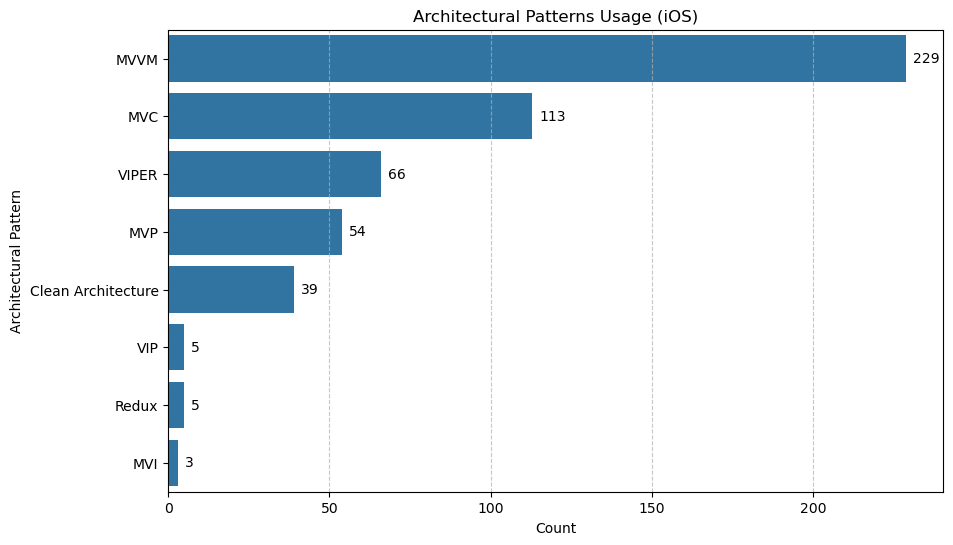

In [10]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_patterns,
    x='count',
    y='architectural_patterns',
    orient='h'
)

for i in ax.containers:
    ax.bar_label(i, padding=5)

plt.title('Architectural Patterns Usage (iOS)')
plt.xlabel('Count')
plt.ylabel('Architectural Pattern')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [11]:
df[df['Platform'] == "Android"]['architectural_patterns'].dropna().str.split(',').explode().str.strip().value_counts().reset_index()

,architectural_patterns,count
0,MVVM,233
1,MVP,97
2,Clean Architecture,78
3,MVC,45
4,MVI,41
5,VIPER,7
6,Redux,3


---

## Domain Analysis

In [ ]:
def analyze_domain_effectiveness(df):
    """Анализирует эффективность домена google.com vs local для каждой страны."""
    domain_counts = df.groupby(["Location", "Google Domain Type"]).size().unstack(fill_value=0)
    
    # Переименовываем столбцы
    domain_counts = domain_counts.rename(columns={"default": "Google.com Jobs", "local": "Local Domain Jobs"})
    
    # Добавляем метрики
    domain_counts["Total Jobs"] = domain_counts.sum(axis=1)
    domain_counts["Google.com Share"] = domain_counts["Google.com Jobs"] / domain_counts["Total Jobs"]
    domain_counts["Local Domain Share"] = domain_counts["Local Domain Jobs"] / domain_counts["Total Jobs"]
    domain_counts["Google vs Local Diff"] = domain_counts["Google.com Share"] - domain_counts["Local Domain Share"]
    
    # Подсчёт уникальных вакансий для каждого домена
    unique_jobs = df.groupby("Job ID")["Google Domain Type"].nunique().reset_index()
    unique_jobs = unique_jobs[unique_jobs["Google Domain Type"] == 1]
    unique_counts = df[df["Job ID"].isin(unique_jobs["Job ID"])].groupby(["Location", "Google Domain Type"]).size().unstack(fill_value=0)
    unique_counts = unique_counts.rename(columns={"default": "Unique Google.com Jobs", "local": "Unique Local Domain Jobs"})
    
    # Объединяем с основными данными
    domain_counts = domain_counts.join(unique_counts, how="left").fillna(0)
    
    print("Анализ эффективности доменов:")
    print(domain_counts.sort_values(by="Google.com Share", ascending=False).head(10))
    
    return domain_counts

domain_table = analyze_domain_effectiveness(df)
domain_table.head()

Анализ эффективности доменов:
Google Domain Type  Google.com Jobs  Local Domain Jobs  Total Jobs  \
Location                                                             
Austria                          63                  0          63   
Hungary                          33                  0          33   
Slovenia                          7                  0           7   
Slovakia                         10                  0          10   
Norway                           12                  0          12   
Netherlands                      81                  0          81   
Malta                             4                  0           4   
Luxembourg                        8                  0           8   
Lithuania                        23                  0          23   
Liechtenstein                     1                  0           1   

Google Domain Type  Google.com Share  Local Domain Share  \
Location                                                   
Austria  

Google Domain Type,Google.com Jobs,Local Domain Jobs,Total Jobs,Google.com Share,Local Domain Share,Google vs Local Diff,Unique Google.com Jobs,Unique Local Domain Jobs
Location,,,,,,,,
Austria,63,0,63,1.000000,0.000000,1.000000,63,0
Belgium,30,0,30,1.000000,0.000000,1.000000,30,0
Bulgaria,26,1,27,0.962963,0.037037,0.925926,26,1
Canada,176,13,189,0.931217,0.068783,0.862434,176,13
Croatia,16,0,16,1.000000,0.000000,1.000000,16,0
